# IMDB ANALYSIS PROJECT - Zeshan Khan & Ahmed Saed

# Motivation
### What is your dataset?
The main dataset that have been used is from kaggle.com, which contains ~5000 movies. The dataset contains: 
* title
* cast
* crew
* budget
* genres
* release_date
* revenue
* runtime
* more..

The dataset contained every element that we needed for our analysis.
With the help of this dataset, we used the python library pysrt and subliminal so we could download every movie subtitle and work with it.

### Why did you choose this/these particular dataset(s)?
As mentioned above the dataset already have information element on movies, this provided an excellent opportunity to just start the analysis straight away. The dataset has titles, id and movie page links, so if any other information needed the dataset could easily be used to obtain it.

### What was your goal for the end user's experience?
Our primary goal was that the user could see the connection to create a successful movie, which actors were needed, which movie genre would make the most profit. For the users only looking for information, that they could see how much movies make, how many movies make it to the top 250 list and other facts about films/scripts and so on.

# Basic stats. Let's understand the dataset better
### Write about your choices in data cleaning and preprocessing
The dataset we chose to work with, was found during the assignment 1. The dataset had already every necessary information on a broad set of movies that we need, and everything was structured nicely, as there wasn't any need for cleaning or manipulation it was an obvious choice. The only part missing was the manuscripts for the movies that we needed for the sentiment analysis. This part was easily solved as we found the API subliminal which downloads subtitles for any movie.

The preprocessing was done with the use of pysrt. This API provides the necessary tools to edit srt files, which are the standard of movie subtitles. The srt files come with the information of when a text piece should be played and for how long during a movie. This was unnecessary as we only need the texts/manuscripts of the movie and nothing else. Pysrt allowed us just to extract text from the srt files and disregard everything else.

###  Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)
The dataset contained around 5000 movies with the full list of actors, budget and so on. There were some movies which had a budget of 0 $, but these were discarded, but as this was only 20 movies it wouldn't influence the dataset that much. 

# Tools, theory and analysis. Describe the process of theory to insight
### Talk about how you've worked with text, including regular expressions, unicode, etc.
We have used a small part of regular expressions to clean some of the datasets. Regular expression was used to extract the only word in the sentiment analysis. The movie titles had some formatting error that was solved with the use of Unicode. 
Overall the dataset text did not require that much handling as it was already formatted and the data was easy to extract and work with.

### Describe which network science tools and data analysis strategies you've used, how those network science measures work, and Why the tools you've chosen are right for the problem, you're solving.
Community detection was the main tool used for the network analysis. This was used to analyze if an actor tends only to make movies within a specific genre. Betweenness centrality was also calculated to check if the rating a movie got had an influence.

### How did you use the tools to understand your dataset?
The tools were easy to work with and gave us a lot of useful information. Creating a network, finding the most influent nodes and visualizing this, was quickly done by the tools we had on hand. With the tool in hand, the dataset was broken down into sections to see if there was any relationship between them, e.g., do a budget influence the revenue a movie makes or do a movie with high revenue always get a high rating.

# Network analysis (Actor Communities, Ratings, Budget and Revenue)

## The idea
The idea here is to analyze to network, the first being the network of a movie. The network will be created based on cast if a film has at least three same cast member, it would be connected. The other network will be generated based on actors if an actor has been in the same movie as another he/she would be connected. 

This section will also be comparing a lot of data to see if there is a pattern to the success of a movie.
## Tools
The Louvain algorithm for community detection is used on the second graf, as we want to see if actors that are closely connected tend only to do movies within a specific genre. 

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import csv
import json
import community
import collections
from datetime import timedelta
import pysrt
import re
from babelfish import Language
from subliminal import download_best_subtitles, region, save_subtitles, scan_videos, Video
import urllib2
import os
import requests
from bs4 import BeautifulSoup
import sys
import pandas as pd
import itertools
from wordcloud import WordCloud
# Font size change
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

In [2]:
G = nx.empty_graph(0) # Empty graph
List_of_movie_cast = [] # list of movie cast
edges = [] # list of edges

with open('tmdb_5000_credits.csv') as csvDataFile: # Open cvs file with credits
    csvReader = csv.reader(csvDataFile) # read file
    for row in csvReader: # loop file lines
        try:
            newdict={}
            list1 = []
            list1.append(row[1])
            names = []
            for val in json.loads(row[2]): # loop all cast list
                names.append(val['name']) # add cast names to list
            list1.append(names) 
            List_of_movie_cast.append(list1) # add cast list to list of movie cast
        except ValueError:
            continue

for idx, cast in enumerate(List_of_movie_cast): # loop through list of movie cast
    for cast2 in List_of_movie_cast[idx:]: # 
        if cast[0] != cast2[0]: # if not same movie
            if len(list(set(cast[1]) & set(cast2[1])))>2: # if movies have same actors
                edges.append((cast[0], cast2[0])) # append edges

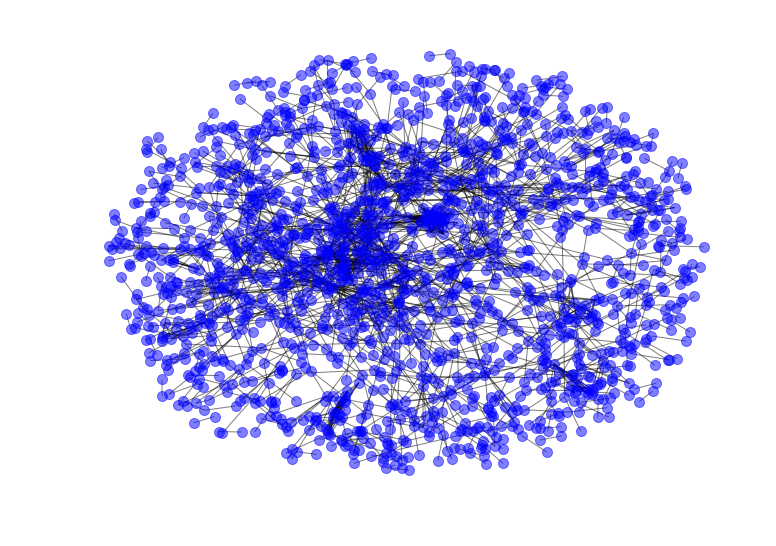

In [5]:
# Code to ajust how the graph should be shown.
G.add_edges_from(edges) # add edges to graf
plt.figure(figsize=(10,7)) # ajust size of plot 
pos = nx.spring_layout(G, k = 0.10)
nx.draw(G , node_size=100,alpha=0.5,node_color="blue", pos = pos) # draw graf
# Show the plot.
plt.show()

In [6]:
# ALl degrees are exctracted and saved to the list 'deg'.
deg = G.degree().values()
labels = G.degree().keys()

# The maximum and minimum degrees are found.
print(min(deg),max(deg))
print(labels[min(deg)], labels[max(deg)] )

(1, 28)
('Funny People', 'Gosford Park')


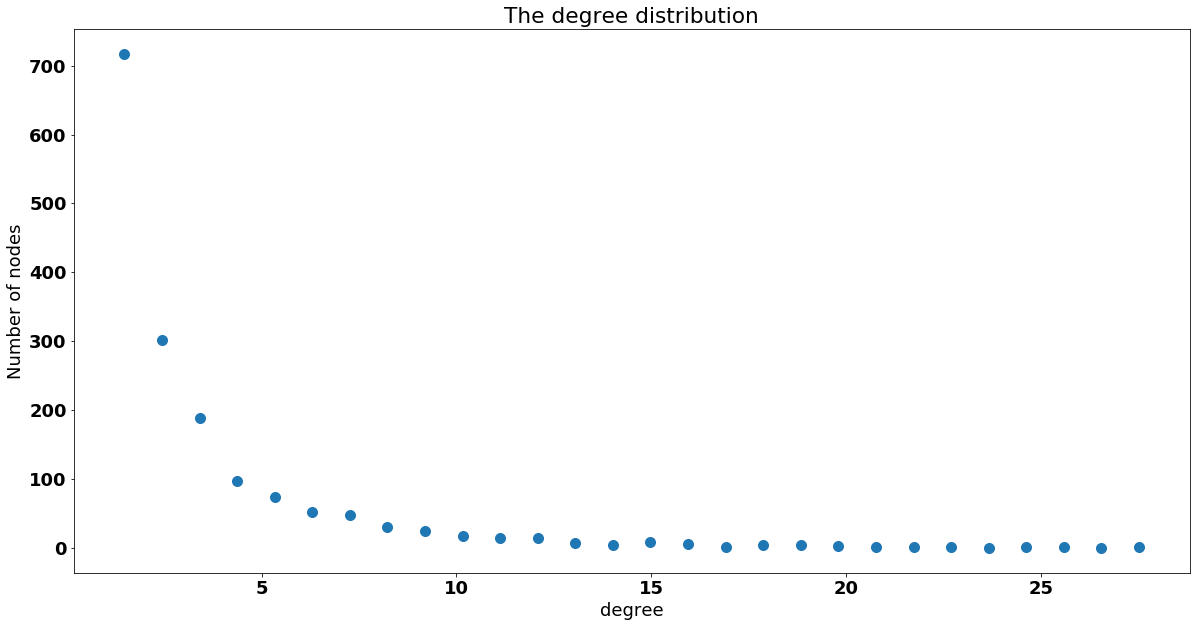

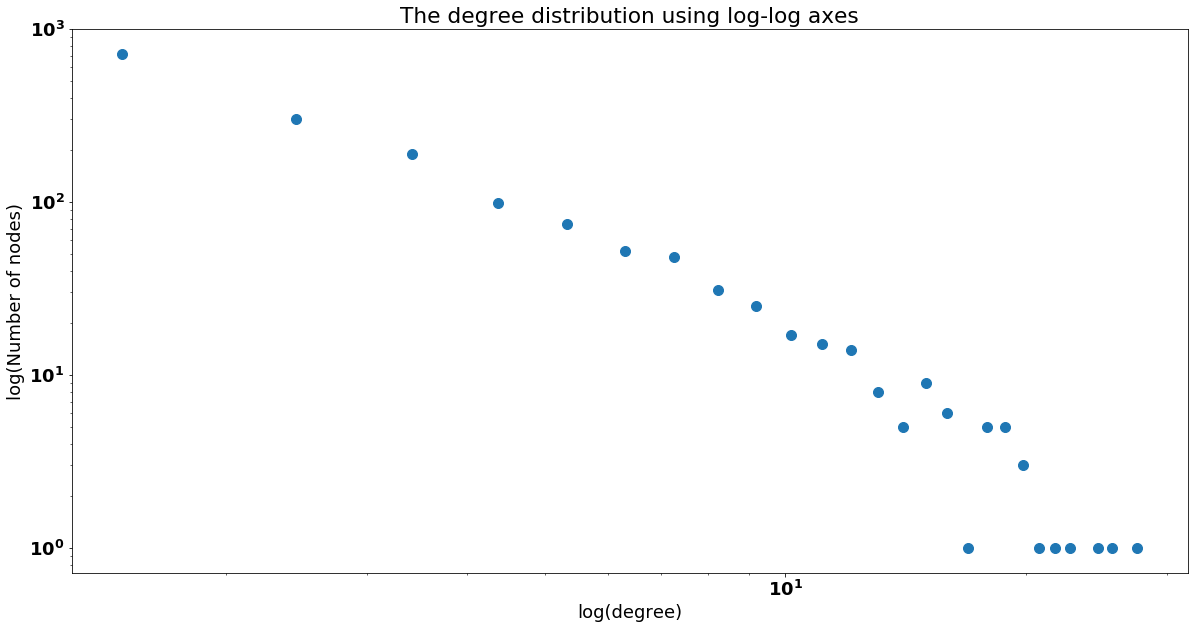

In [7]:
plt.figure(figsize=(20,10))
d = [deg.count(x) for x in sorted(set(deg))] # degree  
hist, bins = np.histogram(deg,np.max(deg)) # a bin for each possible degree
averageBins = [np.mean([bins[i],bins[i+1]]) for i in range(len(bins)-1) ]
# Code to ajust how the graph should be shown.
plt.plot(averageBins, hist, linestyle="None", marker="o", markersize=10)
plt.title('The degree distribution')
plt.ylabel('Number of nodes')
plt.xlabel('degree')
plt.show()
# Code to ajust how the graph should be shown.
plt.figure(figsize=(20,10))
plt.loglog(averageBins,hist,linestyle="None",marker="o",markersize=10)
plt.title("The degree distribution using log-log axes")
plt.ylabel('log(Number of nodes)')
plt.xlabel('log(degree)')
plt.show()

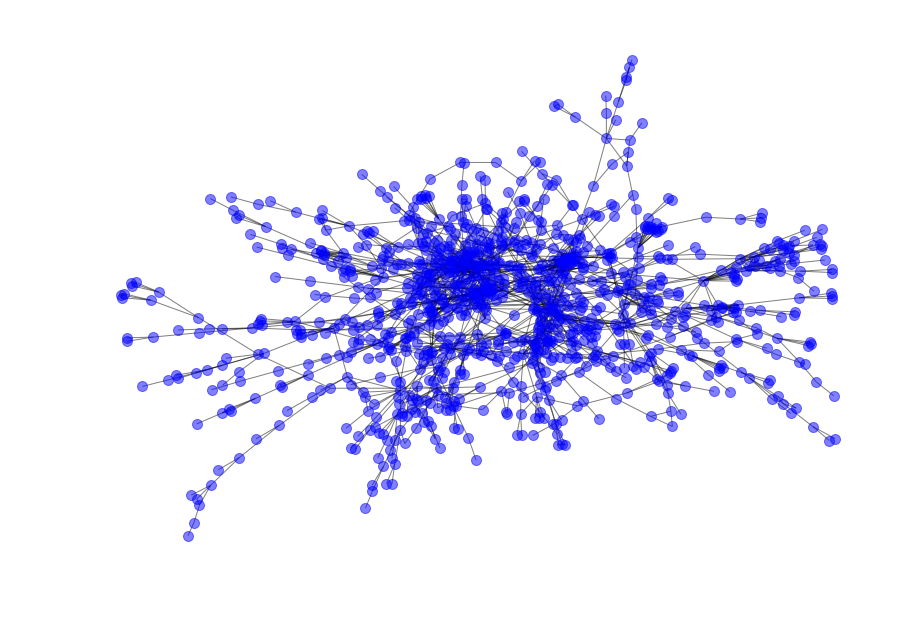

In [8]:
# Code to ajust how the graph should be shown.
plt.figure(figsize=(12,8))
Graf = max(nx.connected_component_subgraphs(G), key=len)
nx.draw(Graf, node_size=100,alpha=0.5,node_color="blue")
plt.show()

In [9]:
BC = nx.betweenness_centrality(G) # calculate betweeness centrality
btc_s = sorted(BC, key = BC.get,reverse = True) # Sort values
for i in range(0,5):  # find top 5
    p = btc_s[i]
    print('{:45s} {}'.format(p, BC[p]))

The Dark Knight Rises                         0.10054201121
The Fighter                                   0.0455517310483
Maleficent                                    0.0402527902084
You Don't Mess with the Zohan                 0.0381964305564
The Departed                                  0.0325438477142


In [10]:
eig = nx.eigenvector_centrality(G)  # calculate eigenvector centrality
eig_s = sorted(eig, key = eig.get,reverse = True)# Sort values
for i in range(0,5): # find top 5
    p = eig_s[i]
    print('{:45s} {}'.format(p, eig[p]))

Grown Ups 2                                   0.27735964737
You Don't Mess with the Zohan                 0.267864857114
Bedtime Stories                               0.256616483492
The Ridiculous 6                              0.25587153537
Pixels                                        0.249395787647


In [11]:
G_of_actor_connections = nx.empty_graph(0) # Empty graph
List_of_movie_cast = [] # list of movie cast
edges = [] # list of edges
Actor_dict = {} # dict of actors and genre
Genre = [] # list of genre 
i = 0
with open('tmdb_5000_movies.csv') as csvDataFile1: # open movies cvs
    for line in csv.reader(csvDataFile1): # loop every line in cvs file
        try:
            Genre.append(json.loads(line[1])[0]['name'])
        except:
            continue
            
with open('tmdb_5000_credits.csv') as csvDataFile: # open credits cvs
    for idx, row in enumerate(csv.reader(csvDataFile)):  # loop every line in cvs file
        i+=1
        if i == 50:break
        try:
            list1 = []
            names = []
            for val in json.loads(row[2]): # loop all the actors in a movie
                names.append(val['name']) # Append all names to list of names
                Actor_dict[val['name']] = Genre[idx] # for every actor found, find the genre of the movie
            list1.append(names) # append names to list
            List_of_movie_cast.append(list1) # append list to list of movie cast
        except ValueError:
            continue
for list_of_movie_cast in List_of_movie_cast: # loop every cast in list of movie cast
    for a, b in itertools.combinations(list_of_movie_cast[0], 2): # find every connection between cast
        edges.append((a, b)) # create a edges list of actors

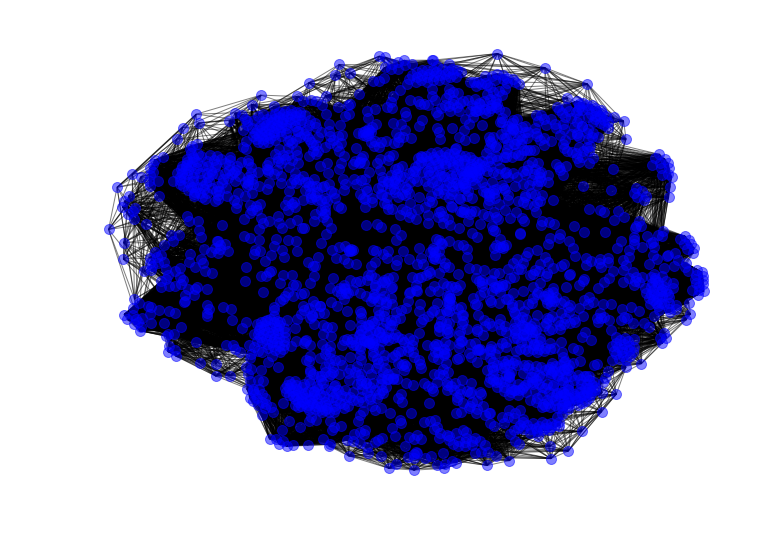

In [12]:
# Code to ajust how the graph should be shown.
G_of_actor_connections.add_edges_from(edges)
plt.figure(figsize=(10,7))
pos = nx.spring_layout(G_of_actor_connections, k = 0.50)
nx.draw(G_of_actor_connections , node_size=100,alpha=0.5,node_color="blue", pos = pos)
# Show the plot.
plt.show()

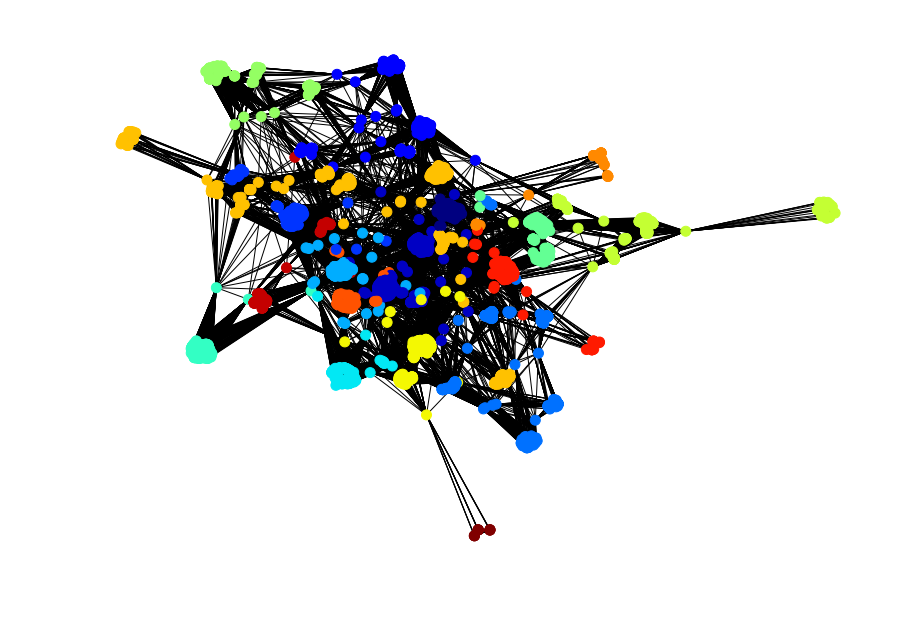

In [13]:
Graf = max(nx.connected_component_subgraphs(G_of_actor_connections), key=len)
part = community.best_partition(Graf)
mod = community.modularity(part,Graf)

values = [part.get(node) for node in Graf.nodes()]

plt.figure(figsize=(12,8))
nx.draw_spring(Graf, scale=3,cmap=plt.get_cmap('jet'), node_color = values, node_size=100, with_labels=False, linewidth = 0.2)
plt.show()

In [15]:
#Iterate through communities and count occurences of each genre in each community.
com_gen_dict = {}
gen_count = {}
for com in set(part.values()):
    list_nodes = [nodes for nodes in part.keys() if part[nodes] == com]
    gen_count = {}
    for n in list_nodes:
        for Actor, genre in Actor_dict.iteritems():  
            if n == Actor:
                if gen_count.get(genre) is None:
                    gen_count[genre] = 1
                else:
                    gen_count[genre] += 1 
    com_gen_dict[com] = gen_count

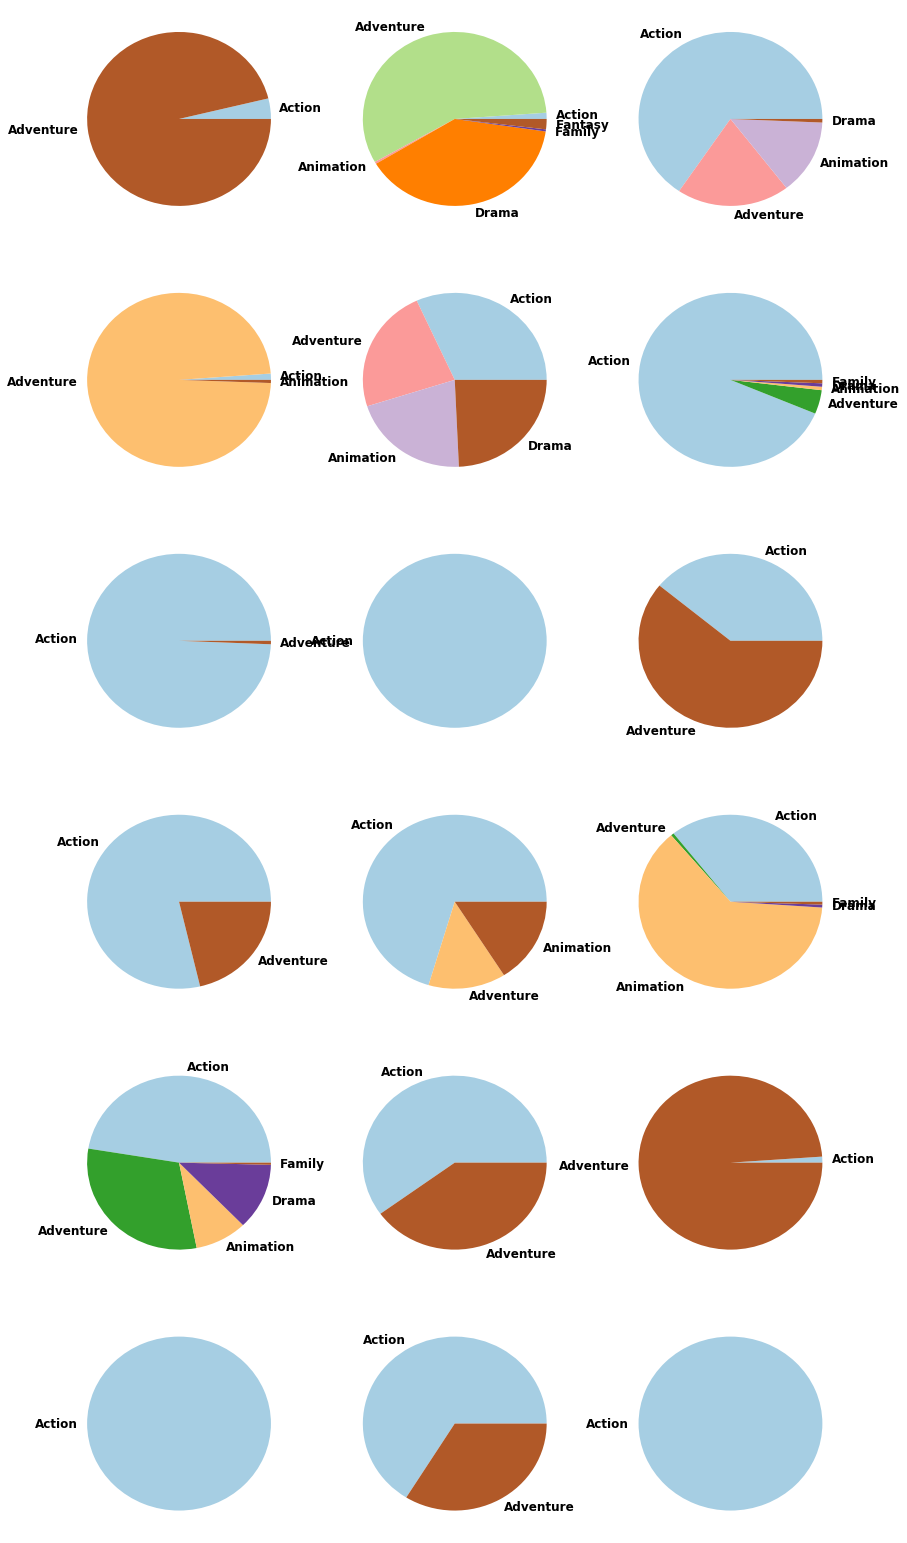

In [16]:
#Create a list of all unique genres
all_gens = []
for k,v in com_gen_dict.iteritems():
    for g in v.keys():
        all_gens.append(g)

# sort every genre        
all_gens = set(all_gens)
all_gens = list(all_gens)
all_gens = sorted(all_gens)

ods = []
for k,v in com_gen_dict.iteritems():
    od = collections.OrderedDict(sorted(v.items()))
    ods.append(od.values())

# Code to ajust how the plot should be shown.
plt.rcParams['font.size'] = 12.0
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(14,28))

i = 0
j = 0
for com in range(18):
    pd.DataFrame(ods[com],columns=['']).plot.pie(subplots=True, colormap='Paired', labels=all_gens,ax=axes[j,i],legend=False)
    if i == 2: 
        i = 0
        j +=1
        continue
    i +=1 

plt.show()

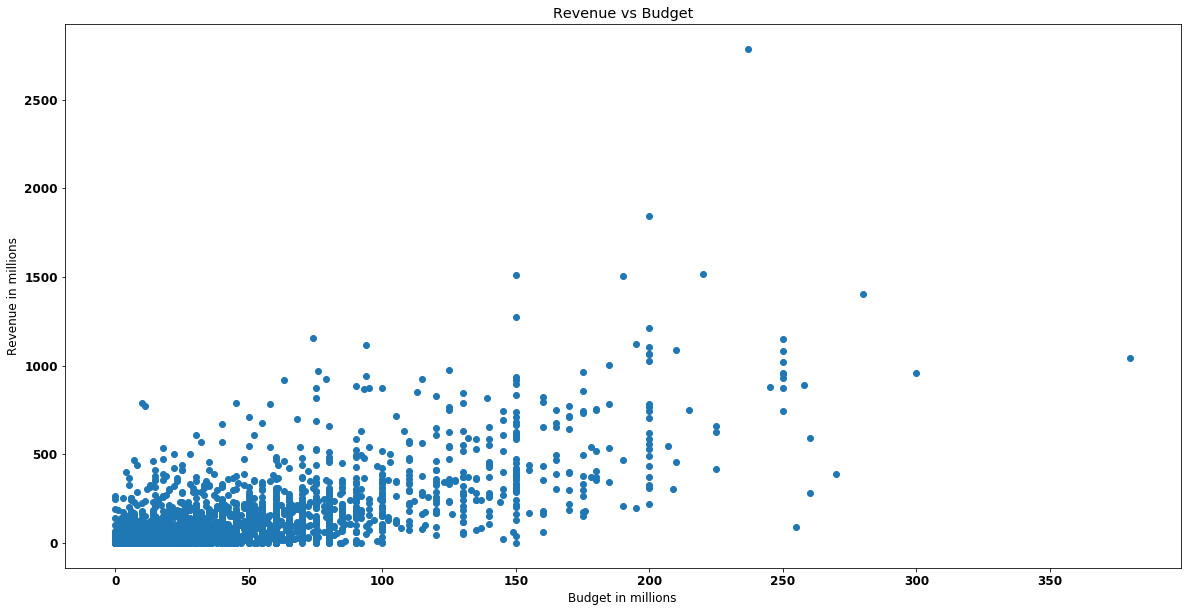

In [17]:
x = []
y = []

with open('tmdb_5000_movies.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        try:
            if int(row[0]) > 0:
                x.append(int(row[0])/1000000)
                y.append(int(row[12])/1000000)
        except ValueError:
            continue
# Code to ajust how the plot should be shown.
plt.figure(figsize=(20,10))
plt.title("Revenue vs Budget")
plt.ylabel('Revenue in millions')
plt.xlabel('Budget in millions')
plt.scatter(x, y, marker='o')
plt.show()

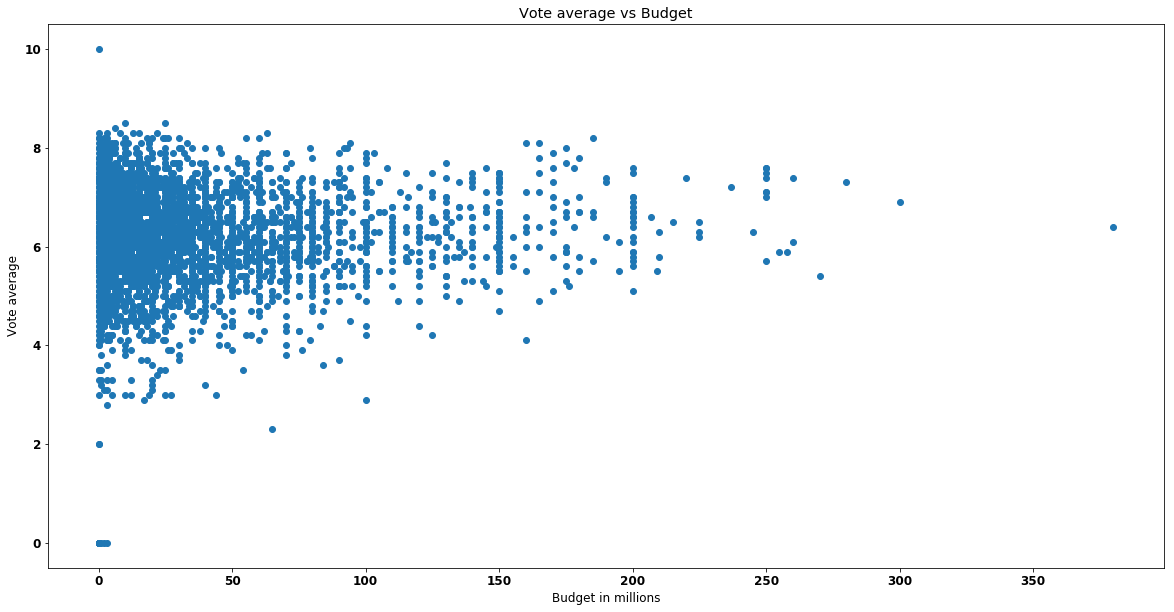

In [18]:
x = []
y = []

with open('tmdb_5000_movies.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        try:
            if int(row[0]) > 0:
                x.append(int(row[0])/1000000)
                y.append(float(row[18]))
        except ValueError:
            continue
# Code to ajust how the plot should be shown.
plt.figure(figsize=(20,10))
plt.title("Vote average vs Budget")
plt.ylabel('Vote average')
plt.xlabel('Budget in millions')
plt.scatter(x, y, marker='o')
plt.show()

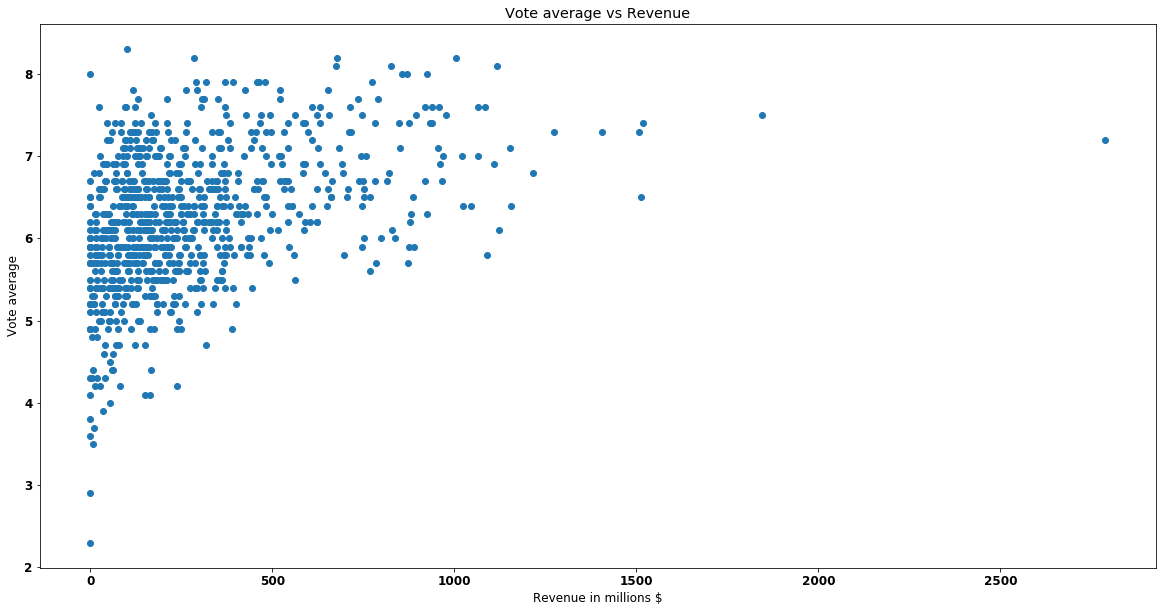

In [19]:
x = []
y = []

with open('tmdb_5000_movies.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        try:
            if int(row[0]) > 50000000:
                x.append(int(row[12])/1000000)
                y.append(float(row[18]))
        except ValueError:
            continue
# Code to ajust how the plot should be shown.
plt.figure(figsize=(20,10))
plt.title("Vote average vs Revenue")
plt.ylabel('Vote average')
plt.xlabel('Revenue in millions $')
plt.scatter(x, y, marker='o')
plt.show()

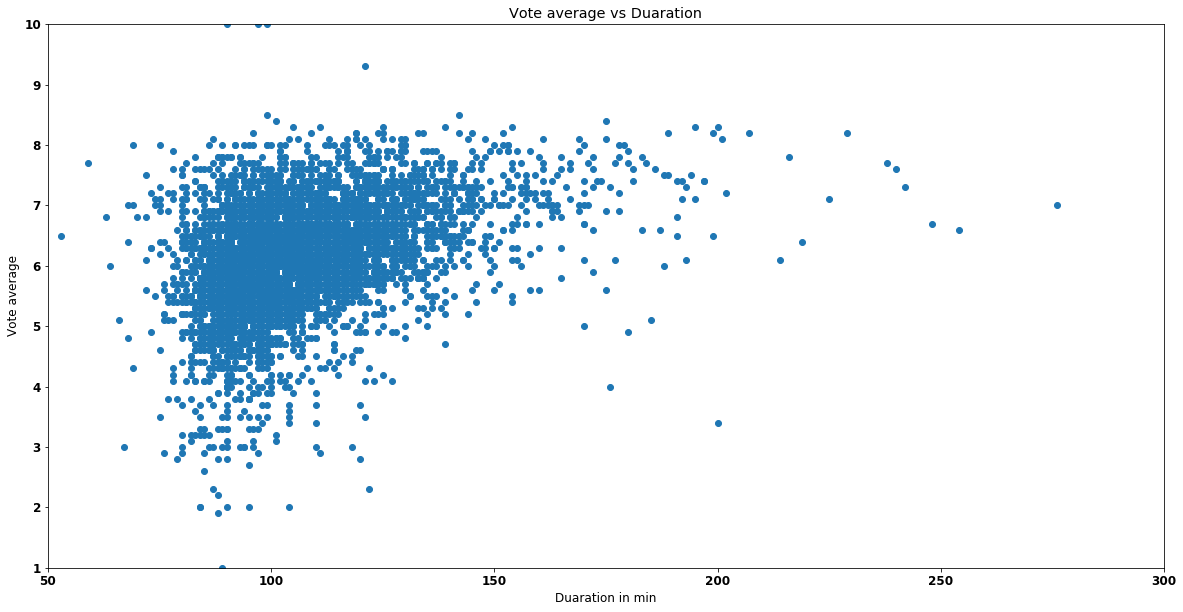

In [20]:
x = []
y = []

with open('tmdb_5000_movies.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        try:
            x.append(int(row[13]))
            y.append(float(row[18]))
        except ValueError:
            continue
# Code to ajust how the plot should be shown.
plt.figure(figsize=(20,10))
plt.title("Vote average vs Duaration")
plt.ylabel('Vote average')
plt.xlabel('Duaration in min')
plt.xlim(50,300)
plt.ylim(1,10)
plt.scatter(x, y, marker='o')
plt.show()

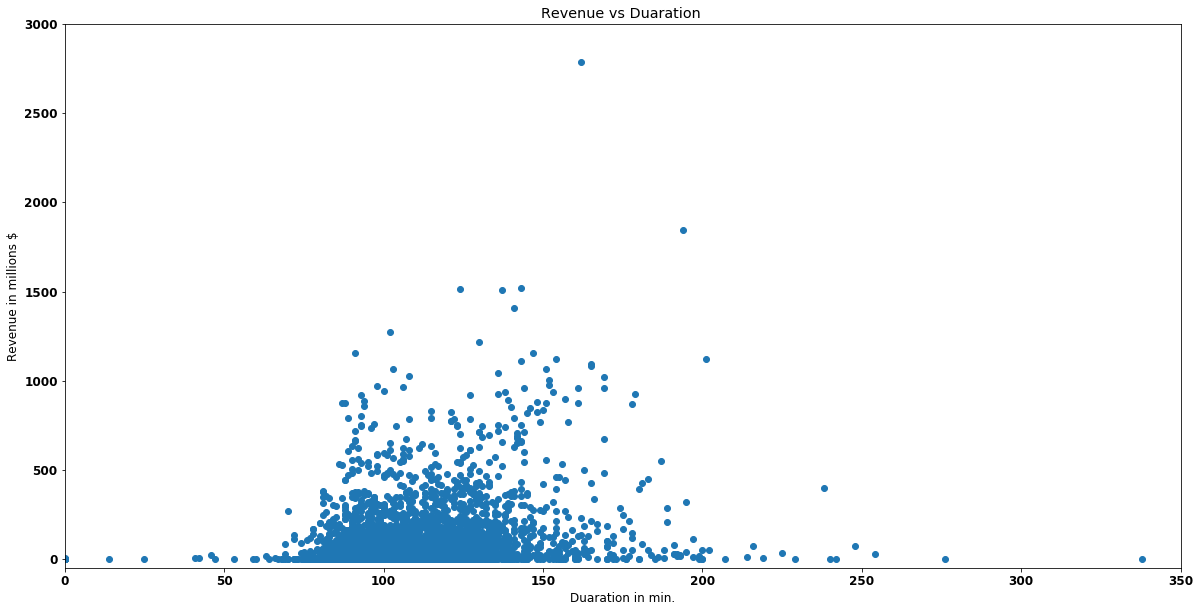

In [21]:
x = []
y = []

with open('tmdb_5000_movies.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        try:
            x.append(int(row[13]))
            y.append(float(row[12])/1000000)
        except ValueError:
            continue
# Code to ajust how the plot should be shown.
plt.figure(figsize=(20,10))
plt.title("Revenue vs Duaration ")
plt.xlabel('Duaration in min.')
plt.ylabel('Revenue in millions $')
plt.ylim(-50,3000)
plt.xlim(0,350)
plt.scatter(x, y, marker='o')
plt.show()

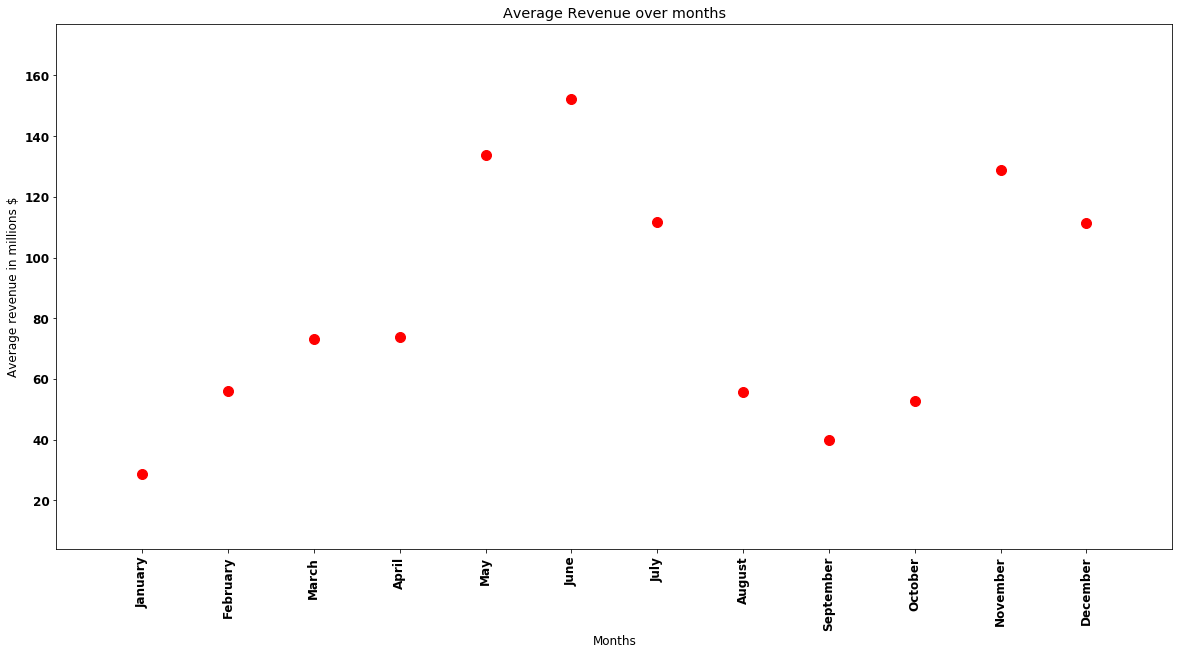

In [22]:
y = []
x = []
labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
with open('tmdb_5000_movies.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        try:
            x.append(row[11].split('-')[1])
            y.append(float(row[12])/1000000)
        except:
            continue
y = [(np.mean([y[idx] for idx, val in enumerate(x) if val == '01'])), 
    (np.mean([y[idx] for idx, val in enumerate(x) if val == '02'])),
    (np.mean([y[idx] for idx, val in enumerate(x) if val == '03'])), 
    (np.mean([y[idx] for idx, val in enumerate(x) if val == '04'])),
    (np.mean([y[idx] for idx, val in enumerate(x) if val == '05'])),
    (np.mean([y[idx] for idx, val in enumerate(x) if val == '06'])),
    (np.mean([y[idx] for idx, val in enumerate(x) if val == '07'])),
    (np.mean([y[idx] for idx, val in enumerate(x) if val == '08'])),
    (np.mean([y[idx] for idx, val in enumerate(x) if val == '09'])),
    (np.mean([y[idx] for idx, val in enumerate(x) if val == '10'])),
    (np.mean([y[idx] for idx, val in enumerate(x) if val == '11'])),
    (np.mean([y[idx] for idx, val in enumerate(x) if val == '12']))]

x = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.figure(figsize=(20,10))
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
# Code to ajust how the plot should be shown.
plt.subplots_adjust(bottom=0.15)
plt.title("Average Revenue over months")
plt.ylabel('Average revenue in millions $')
plt.xlabel('Months')
plt.xlim(0,13)
plt.plot(x, y, 'ro', markersize=10)
plt.show()

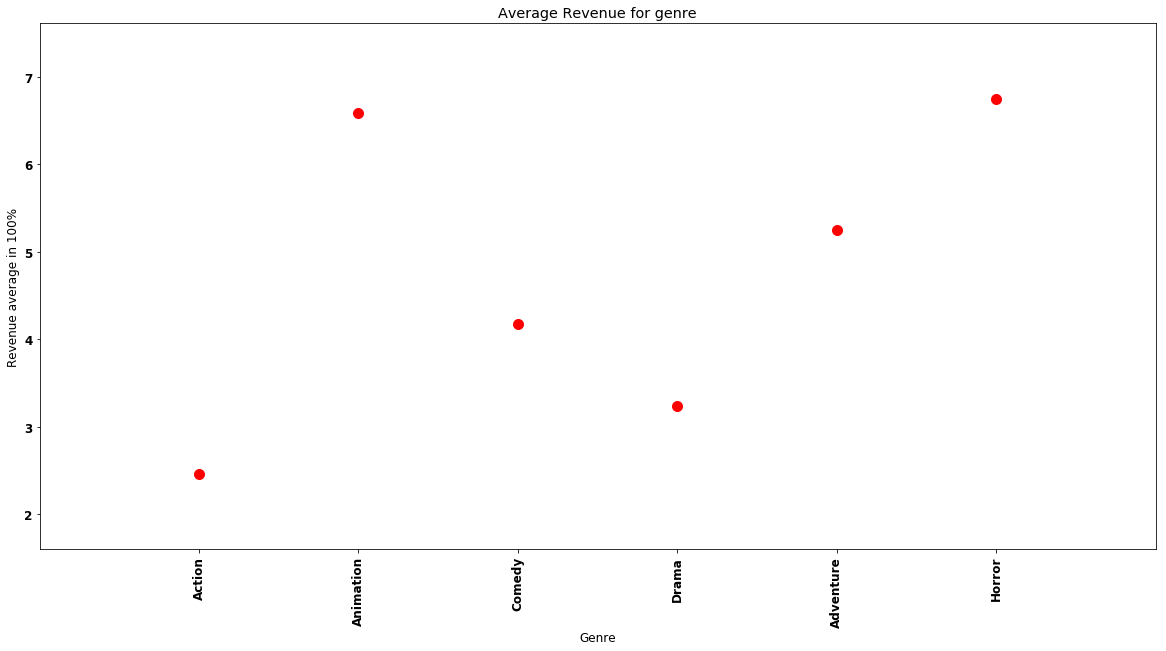

In [23]:
labels = ['Action','Animation','Comedy','Drama','Adventure','Horror']
x = [1,2,3,4,5,6]
Action = []
Animation= []
Comedy= []
Drama= []
Adventure= []
Horror = []
with open('tmdb_5000_movies.csv', ) as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        try:
            if int(row[0]) > 0:
                if json.loads(row[1])[0]['name'] == 'Action':
                    if int(row[12]) > 0:
                        Action.append(float(row[12])/float(row[0]))
                    else:
                        Action.append(-1.0)
                if json.loads(row[1])[0]['name'] == 'Animation':
                    if int(row[12]) > 0:
                        Animation.append(float(row[12])/float(row[0]))
                    else:
                        Animation.append(-1.0)
                if json.loads(row[1])[0]['name'] == 'Comedy':
                    if int(row[12]) > 0:
                        Comedy.append(float(row[12])/float(row[0]))
                    else:
                        Comedy.append(-1.0)
                if json.loads(row[1])[0]['name'] == 'Drama':
                    if (float(row[12])/float(row[0])) > 100: continue
                    if int(row[12]) > 0:
                        Drama.append(float(row[12])/float(row[0]))
                    else:
                        Drama.append(-1.0)
                if json.loads(row[1])[0]['name'] == 'Adventure':
                    if int(row[12]) > 0:
                        Adventure.append(float(row[12])/float(row[0]))
                    else:
                        Adventure.append(-1.0)
                if json.loads(row[1])[0]['name'] == 'Horror':
                    if (float(row[12])/float(row[0])) > 100: continue
                    if int(row[12]) > 0:
                        Horror.append(float(row[12])/float(row[0]))
                    else:
                        Horror.append(-1.0)
        except:
            continue

y = [(np.mean(Action)), (np.mean(Animation)),(np.mean(Comedy)),(np.mean(Drama)),(np.mean(Adventure)),(np.mean(Horror))]
plt.figure(figsize=(20,10))
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
# Code to ajust how the plot should be shown.
plt.subplots_adjust(bottom=0.15)
plt.title("Average Revenue for genre")
plt.ylabel('Revenue average in 100%')
plt.xlabel('Genre')
plt.plot(x, y, 'ro', markersize=10)
plt.show()

In [32]:
os.getcwd() # current working directory
os.chdir('C:\Users\Zeshan\Desktop\sociale graffer last assignment')   # change current working directory

# get the current encoding
type = sys.getfilesystemencoding()

# request the webpage
headers = {"Accept-Language":"en"}
req = requests.get("http://akas.imdb.com/chart/top?ref_=nv_mv_250_6", headers=headers)
page = req.text
soup = BeautifulSoup(page, 'html.parser')

# get top 250 movie names and years, may take ~30 seconds
movie_names = []
movie_year = [0] * 250

j = 0
for i in range(250):
    content = str(soup.findAll('td', {'class':'titleColumn'})[i])
    #content = content.decode("UTF-8").encode(type)
    name = re.findall ( '>(.*?)</a>', content)
    movie_names.insert(len(movie_names), name)
    
    year = str(soup.findAll('span', {'class':'secondaryInfo'})[i])
    movie_year[i] = int(re.findall(r"\(([0-9_]+)\)", year)[0])

# export to the text file
open("top250names.txt", "w").write("\n".join(("\t".join(item)) for item in movie_names))

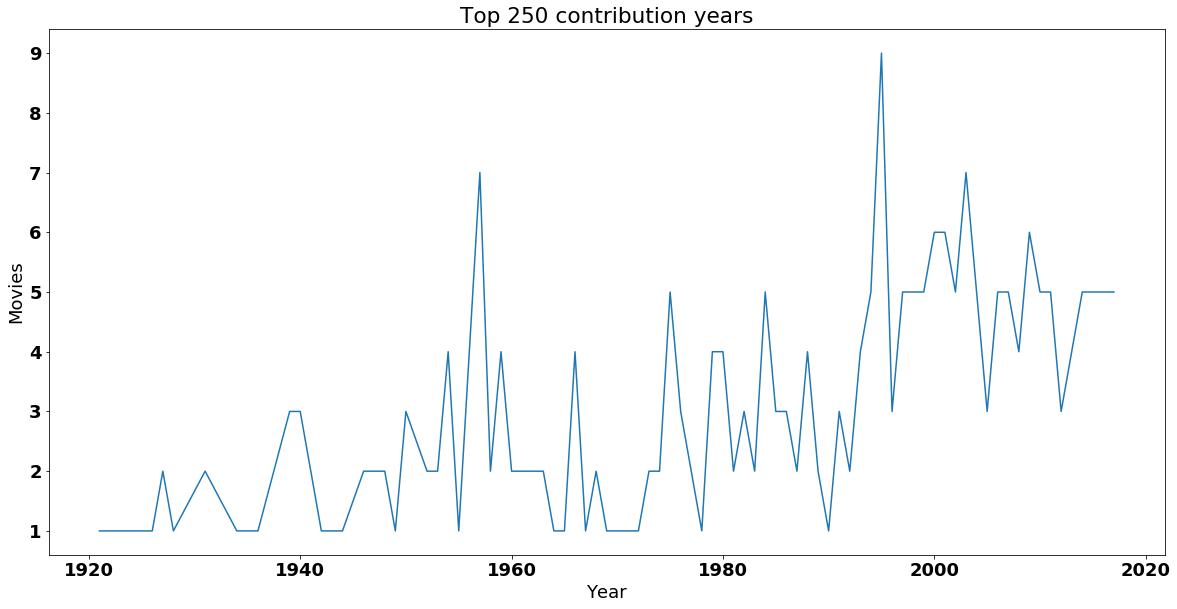

In [33]:
######## plot the count by time #########################
# compute the frequency table
y = np.bincount(movie_year)
ii = np.nonzero(y)[0]
out = zip(ii, y[ii])
# crete a dataframe
df = pd.DataFrame(out, columns = ['Year', 'Freq'], index = ii)
# drop the first Year column since I already assign valid index
df.drop(df.columns[0], axis = 1)
# Code to ajust how the plot should be shown.
plt.figure(figsize=(20,10))
plt.subplots_adjust(bottom=0.15)
plt.title("Top 250 contribution years")
plt.ylabel('Movies')
plt.xlabel('Year')
plt.plot(ii, df['Freq'])
plt.show()

# Outcome

The overall idea of the network analysis was to find if there was a pattern to create a successful movie. The outcome of each element will be discussed step by step here after a conclusion.

The first network of movies is created to see if centrality is based on rating. The top 5 nodes with the highest centrality in the network show that this is not the case. High centrality is not based on rating but instead, tell that the movie 'The Dark Knight Rises' have a lot of actors who are also in many other films. So this tells us that the film on the top 5 list is either has some very famous/very productive actors.

The second network was created to see if actors tend only to do movies in the same genre. From the communities in the network, it shows us that this could be the case as a lot of communities only do the same genre movies and if they too other genres this is just a tiny portion.

The budget does not equal revenue but as the 'budget vs revenue' plot show us that a movie with a 50 mil budget never makes over 800 million in revenue, so if you want to make a movie with over two billion in revenue your budget has to be around 200 million.

The budget has nothing to do with rating.

Revenue is not equal to an excellent rating. A movie with less revenue can get an as good or better revenue as a movie that made more in revenue. 

Rating is not affected by the duration.

Revenue is not affected by duration, but movies around 50-70 min of playtime do not make as much revenue as movies from 80 min and above do. So it can be seen that a movie could always be around 80 min and over.

The graf of revenue against release month shows that the best months of revenue is may, June, July and November and December. These months contains all the holidays and which could be the reason for a good revenue.

The best genre that brings high revenue is Animation, Horror, and adventure.

Around 3-7 movies make it to the top 250 list every year.


## Conclusion

The is not a præcis method on how to make a good movie with a lot of revenue, but some step can be taken to have the best possible chance to do good. 

If you are only going to revenue, there are some precaution you can make. First of all the runtime of the movie should be around 80 min or over, the second step should be to choose the genre carefully, as not every kind has a good return average. If you decide from Animation, Horror, and adventure, you are good to go. The release date is also a factor that should be considered carefully as not every month bring the same revenue. 

If you only want a movie with an excellent rating and want to make it to the top 250 list, there is nothing much you can do. The statistic shows that 3-7 movies reach the top 250 list every year, so if there is already seven movies that made it to the top wait to the next year before release.


# Sentiment
## The idea
The idea is to calculate the sentiment values of some top movies and some bottom movies. We want to see if a movie's rating is based on the sentiment of the manuscript. We also want to calculate the sentiment value of movies released over the years, and this will show if older movies have a better sentiment value. 


## Tools
The tools we will use to calculate the sentiment value is the LabMT wordlist, which contains the over 10.000 word evaluated according to happiness. Subliminal and pysrt will be used to download and handle the text.

### Subtitle Downloader

In [26]:
def Subtitle_of_movie(name):
    # Video fromname
    videos = Video.fromname(name)
    # download best subtitles
    subtitles = download_best_subtitles([videos], {Language('eng')})
    for v in [videos]: # loop through all videos
        text = ''
        for val in pysrt.from_string(subtitles[v][0].text): # subtitles from text
            text += val.text
    return set(re.findall('\w+',text))

### Sentiment Profile Calculator

In [27]:
# The fuction that calulates the sentiment profile.
def calculates_sentiment_profile(list_of_token):
    sentiment_score = {}
    list_of_words ={}
    with open('Data_Set_S1.txt', 'rb') as tsvfile:
        # Use cvs reader to export to a excel-tab layout
        a = csv.reader(tsvfile,dialect='excel-tab')
        # reads every line
        for row in a:
            # creates dict of all the word in the data file
            list_of_words[row[0]] = row[2]
        # loops though the list of tokens
        for index, token in enumerate(list_of_token):
            # if the token is in the list of words.
            if token in list_of_words:
                # add the sentiment score in the list
                sentiment_score[index] = float(list_of_words[token])
    # return the list of sentiments
    return sum(sentiment_score.values())/len(sentiment_score)

### Top 5 and buttom 5 movies sentiment values

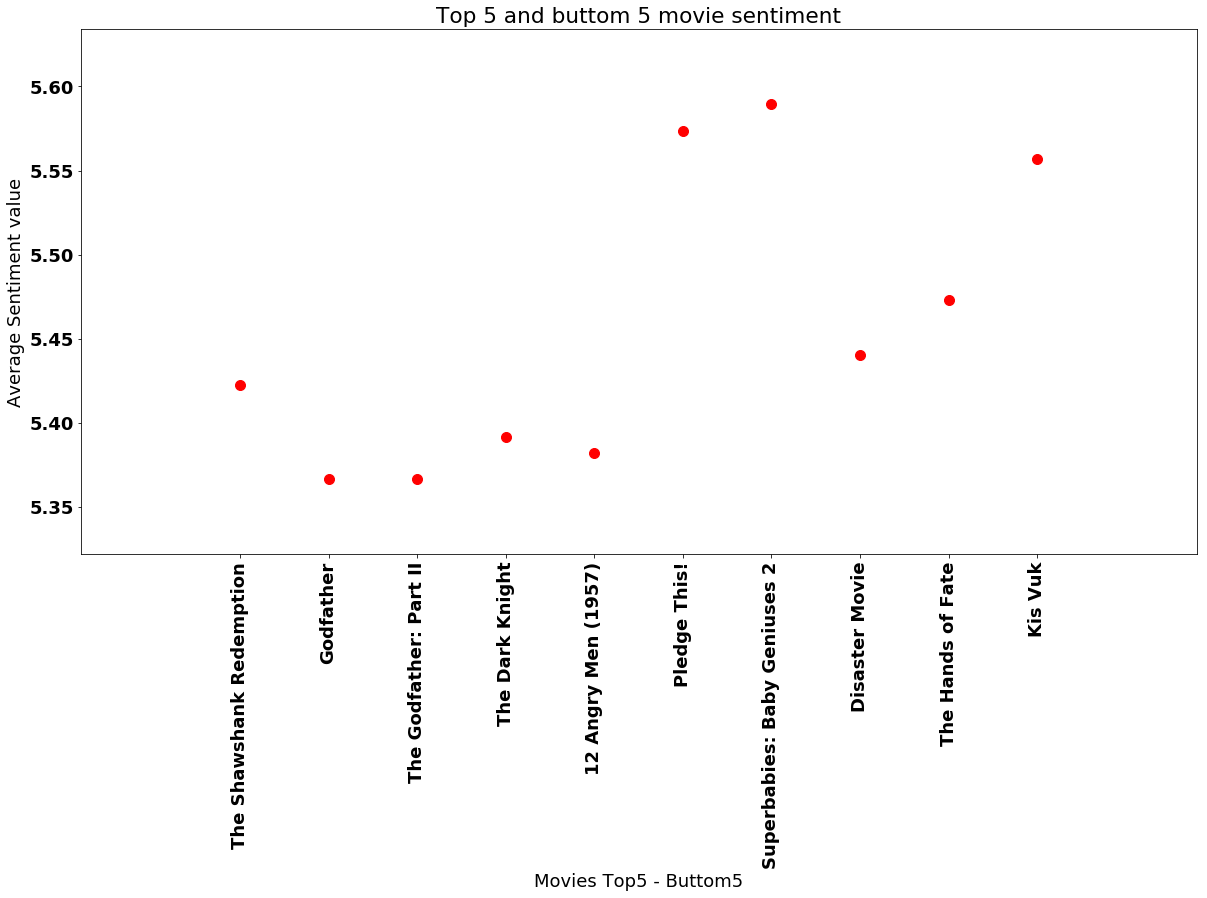

In [30]:
Top5Movies= ['The Shawshank Redemption','Godfather', 'The Godfather: Part II', 'The Dark Knight', '12 Angry Men (1957)']
Top5ButtomMovies  = ['Pledge This!','Superbabies: Baby Geniuses 2','Disaster Movie','The Hands of Fate', 'Kis Vuk']

labels = Top5Movies+Top5ButtomMovies
x = [1,2,3,4,5,6,7,8,9,10]
y = []
for movie in Top5Movies:
    y.append(calculates_sentiment_profile(Subtitle_of_movie(movie)))
for movie in Top5ButtomMovies:
    y.append(calculates_sentiment_profile(Subtitle_of_movie(movie)))

plt.figure(figsize=(20,10))
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
# Code to ajust how the plot should be shown.
plt.subplots_adjust(bottom=0.15)
plt.title("Top 5 and buttom 5 movie sentiment")
plt.ylabel('Average Sentiment value')
plt.xlabel('Movies Top5 - Buttom5')
plt.plot(x, y, 'ro', markersize=10)
plt.show()

In [44]:
movie_sentiment = []
for idx, movie in enumerate(movie_names):
    try:
        movie_sentiment.append(calculates_sentiment_profile(Subtitle_of_movie(movie[0])))
    except:
        movie_sentiment.append(5.4)

C:\Users\Zeshan\Anaconda2\lib\site-packages\subliminal\subtitle.py:224: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if video.title and 'title' in guess and sanitize(guess['title']) == sanitize(video.title):


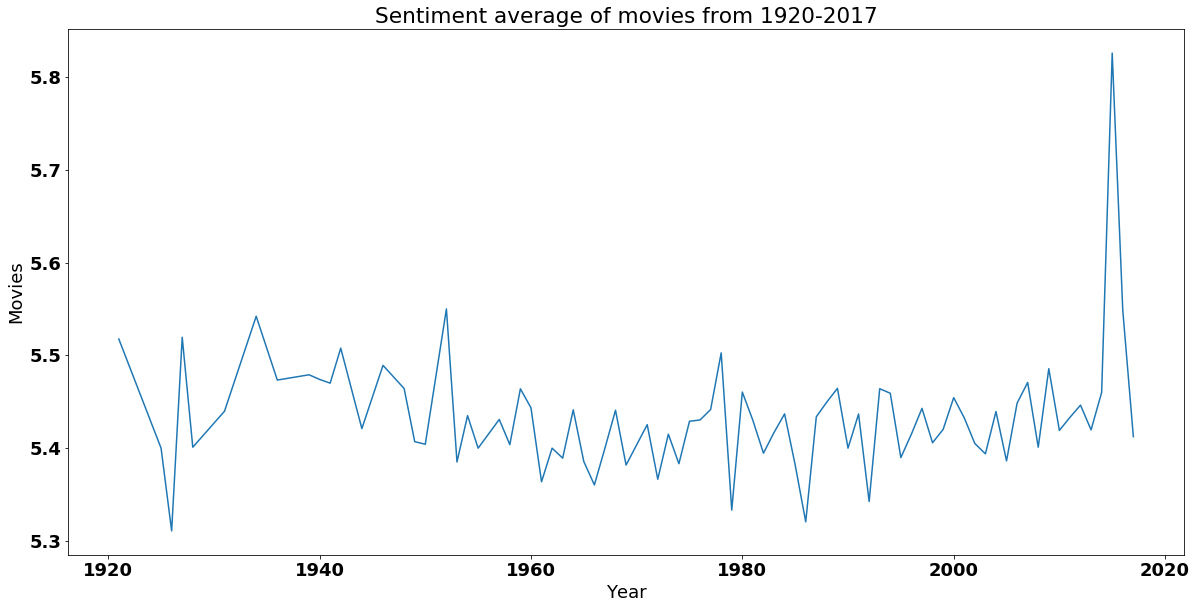

In [45]:
######## plot the count by time #########################
# compute the frequency table
avg_moviesentiment_year = []
year = 0
list1 = []
i = 0
for index in sorted(range(len(movie_year)), key=lambda k: movie_year[k]):
    i +=1 
    if year == 0: 
        year = movie_year[index]
        list1.append(movie_sentiment[index])
        continue
    if year == movie_year[index]:
        list1.append(movie_sentiment[index])
    else:
        year = movie_year[index]
        avg_moviesentiment_year.append(sum(list1)/len(list1))
        list1 = []
        list1.append(movie_sentiment[index])
    if i == 250:
        avg_moviesentiment_year.append(sum(list1)/len(list1))

out = zip(ii, avg_moviesentiment_year)
# crete a dataframe
df = pd.DataFrame(out, columns = ['Year', 'sentiment'], index = ii)
# drop the first Year column since I already assign valid index
df.drop(df.columns[0], axis = 1)
# Code to ajust how the plot should be shown.
plt.figure(figsize=(20,10))
plt.subplots_adjust(bottom=0.15)
plt.title('Sentiment average of movies from 1920-2017')
plt.ylabel('Movies')
plt.xlabel('Year')
plt.plot(ii, df['sentiment'])
plt.show()

In [46]:
print('Top 5 movies with best sentiment:')
for idx in sorted(range(len(movie_sentiment)), key=lambda k: movie_sentiment[k])[-5:]:
    print('{:25s} {} {:4.1f} {} {}'.format((str(movie_names[idx][0]).replace('·',' '))+':',' Sentiment:', movie_sentiment[idx], 'Year:', movie_year[idx]))

print('')   
print('Top 5 movies with lowest sentiment:')
for idx in sorted(range(len(movie_sentiment)), key=lambda k: movie_sentiment[k])[:5]:
    print('{:25s} {} {:4.1f} {} {}'.format((movie_names[idx][0])+':',' Sentiment:', movie_sentiment[idx], 'Year:', movie_year[idx]))


Top 5 movies with best sentiment:
Star Wars: The Force Awakens:  Sentiment:  5.6 Year: 2015
Singin' in the Rain:       Sentiment:  5.7 Year: 1952
Hachi: A Dog's Tale:       Sentiment:  5.7 Year: 2009
La La Land:                Sentiment:  5.9 Year: 2016
Mad Max: Fury Road:        Sentiment:  7.0 Year: 2015

Top 5 movies with lowest sentiment:
Apocalypse Now:            Sentiment:  5.0 Year: 1979
The Great Escape:          Sentiment:  5.2 Year: 1963
Aliens:                    Sentiment:  5.2 Year: 1986
Rashomon:                  Sentiment:  5.2 Year: 1950
A Separation:              Sentiment:  5.3 Year: 2011


# Outcome

As the first plot shows in the sentiment analysis, a good movie does not mean a good sentiment value. The fact is that the top 5 worst movies have a better sentiment value than the top 5 movies, which wasn't what we expected. 

The next value shows that the average sentiment value was for movies released over the year. As can be seen from the plot, there isn't that much fluctuation. The sentiment value stays around 5.4 to 5.6. Our expected was that there would have been more fluctuation, as the vocabulary over the years has become harsher than before. 

# Text analysis of Subtitles


## The idea
The idea is to see if any words characterize the genre of a movie. If the genre is horror do we find more word like murder, blood, and ghosts. The overview of the movies will also be checked to see if they characterize the genre.


## Tools
The only new tool that will be used is word cloud. The tools subliminal pysrt is still used to download and handle the subtitles.

### Wordclouds - subtitles 

In [34]:
Genre = ['Action','Animation','Adventure','Comedy','Drama','Crime','Horror','Science Fiction' ]
DictGenre = {'Action':'','Animation':'','Adventure':'','Comedy':'','Drama':'','Crime':'','Horror':'','Science Fiction':''}
i = 0

for idx, genre in enumerate(Genre):
    with open('tmdb_5000_movies.csv') as csvDataFile:
        csvReader = csv.reader(csvDataFile)
        for row in csvReader:
            try:
                if json.loads(row[1])[0]['name']  == genre:
                    if i == 1: 
                        i = 0
                        break
                    DictGenre[genre] += ' '.join(Subtitle_of_movie(row[17]))
                    i += 1 
            except:
                continue

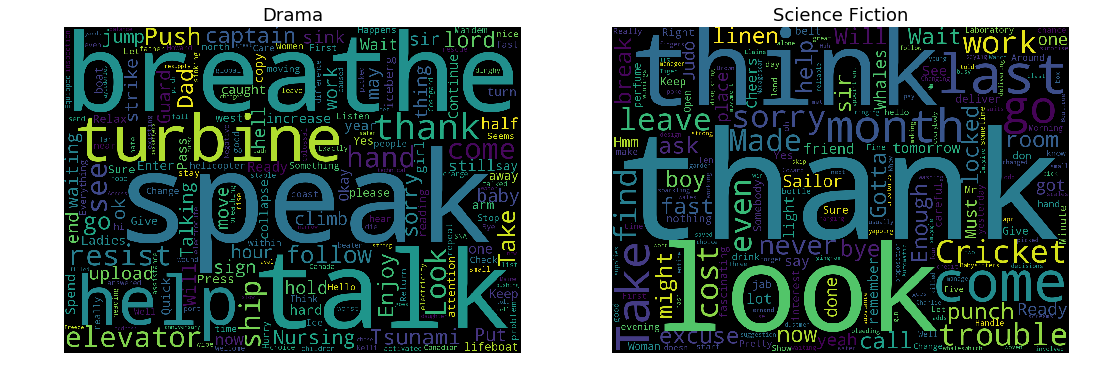

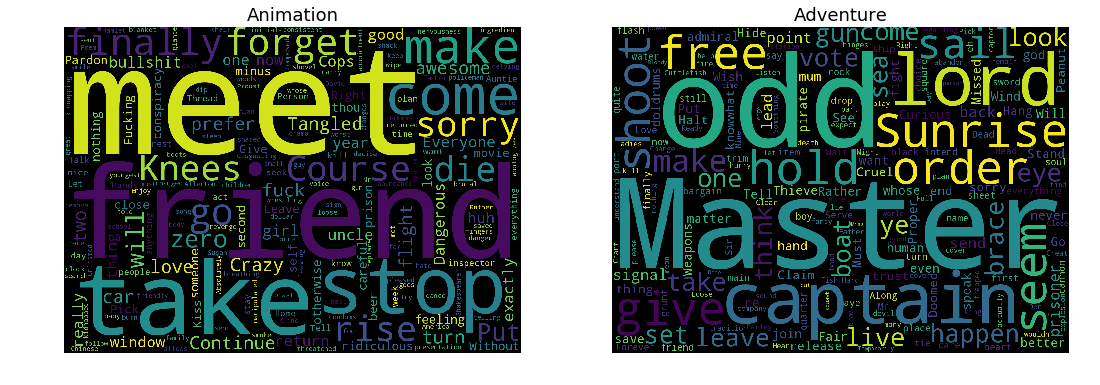

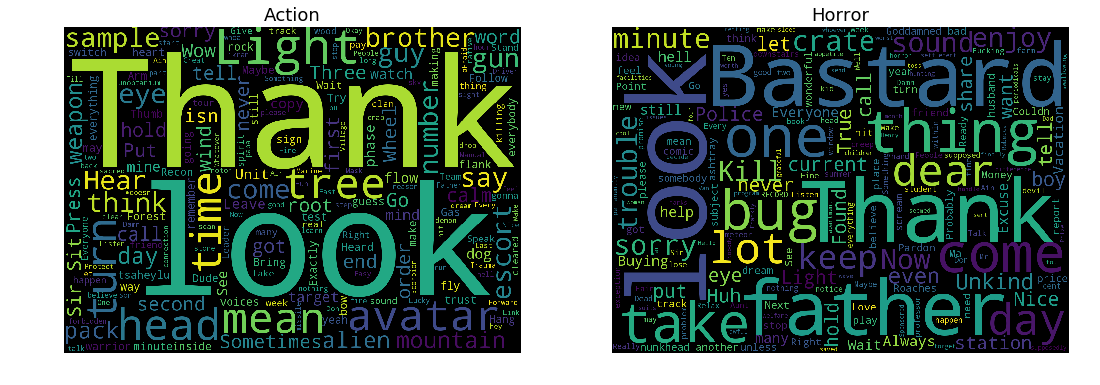

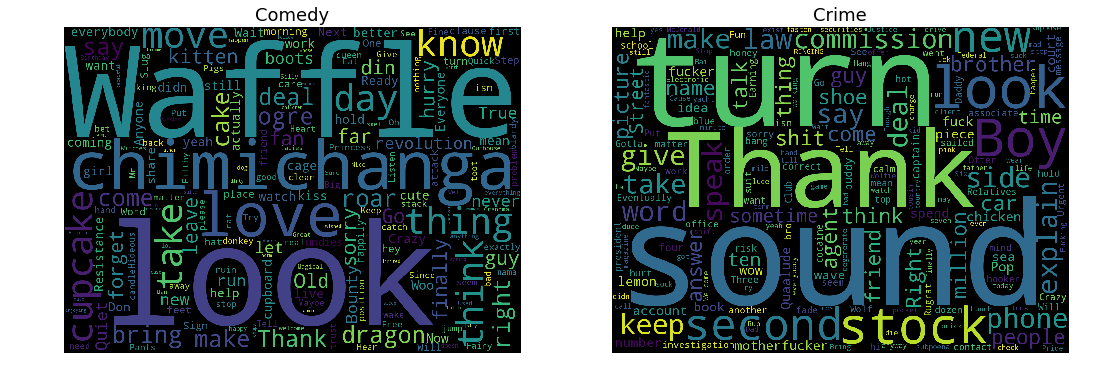

In [35]:
i = 0
plt.figure(figsize=(18,10))
for key, value in DictGenre.items():
    if i == 0:
        i = 1 
        wordcloud = WordCloud(background_color = 'black',width=1400,height=1000).generate(value)
        plt.subplot2grid((2,2),(0,0), rowspan = 2)
        plt.imshow(wordcloud)
        plt.title(key,fontsize=18)
        plt.axis('off')
    else:
        i = 0
        wordcloud = WordCloud(background_color = 'black',width=1400,height=1000).generate(value)
        plt.subplot2grid((2,2),(0,1), rowspan = 2)
        plt.imshow(wordcloud)
        plt.title(key,fontsize=18)
        plt.axis('off')
        plt.show()
        plt.figure(figsize=(18,10))


### Wordclouds - Overview 

In [36]:
Genre = ['Action','Animation','Adventure','Comedy','Drama','Crime','Horror','Science Fiction' ]
DictGenre = {'Action':'','Animation':'','Adventure':'','Comedy':'','Drama':'','Crime':'','Horror':'','Science Fiction':''}

for idx, genre in enumerate(Genre):
    with open('tmdb_5000_movies.csv') as csvDataFile:
        csvReader = csv.reader(csvDataFile)
        for row in csvReader:
            try:
                if json.loads(row[1])[0]['name']  == genre:
                    DictGenre[genre] += row[7]
            except:
                continue

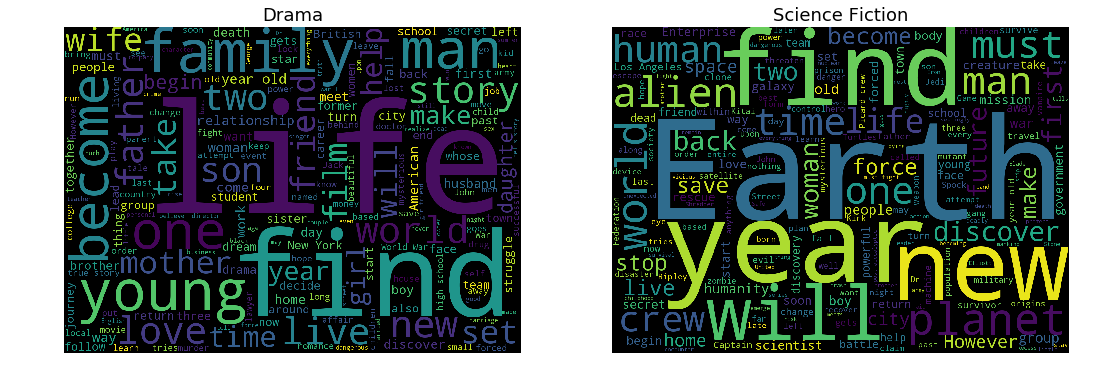

In [37]:
i = 0
plt.figure(figsize=(18,10))
for key, value in DictGenre.items():
    if i == 0:
        i = 1 
        wordcloud = WordCloud(background_color = 'black',width=1400,height=1000).generate(value)
        plt.subplot2grid((2,2),(0,0), rowspan = 2)
        plt.imshow(wordcloud)
        plt.title(key,fontsize=18)
        plt.axis('off')
    else:
        i = 0
        wordcloud = WordCloud(background_color = 'black',width=1400,height=1000).generate(value)
        plt.subplot2grid((2,2),(0,1), rowspan = 2)
        plt.imshow(wordcloud)
        plt.title(key,fontsize=18)
        plt.axis('off')
        plt.show()
        plt.figure(figsize=(18,10))

# Outcome

From the wordcloud, we can see that they are very descriptive and emphasizes some of the words we would associate with a movie genre. The genre Horror contains words like kill, murder, blood, and police which would emphasize the genre. The overview of the movie is very common in every movie genre. The words found here find, one, life, world, year and family which are all positive words.

# Discussion

### What went well?
Everything we set out to discover as found, the dataset gave good results and had every information that we needed to complete our analysis. So overall everything was done, that we wanted to analyze.

### What is still missing? What could be improved?, Why?
The main problems we experienced was with the subtitle library Subliminal the problem was that it did not find subtitles to every movie. As an outcome of this issue made it very difficult to a make 100% accurate plot. 

Another element that we would say is not fully complete is the sentiment analysis. The movies we did the sentiment analysis on was only 250, if we wanted to more accurate, this should have been done on more movies. The reason we just did it on 250 movies was that it took around 20 sec pr movie to download its subtitle.